#### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

#### Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset Link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

#### Q3. Check for null values, identify categorical variables, and encode them.

#### Q4. Separate the features and target variables from the dataset.

#### Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

#### Q6. Scale the dataset using an appropriate scaling technique.

#### Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

#### Q8. Create a Sequential model in Keras and add the previously designed layers to it.

#### Q9. Print the summary of the model architecture.

#### Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

#### Q11. Compile the model with the specified loss function, optimizer, and metrics.

#### Q12. Fit the model to the training data using appropriate batch size and number of epochs.

#### Q13. Obtain the model's parameters (weights and biases).

#### Q14. Store the model's training history as a Pandas DataFrame.

#### Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

#### Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [6]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Q1: Print TensorFlow and Keras versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.14.0


AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

In [9]:
# Q2: Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=";")

# Q3: Check for null values and encode categorical variables (if any)
print("Null values:\n", wine_data.isnull().sum())

Null values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
18/18 [==============================] - 1s 17ms/step - loss: 0.6711 - accuracy: 0.5952 - val_loss: 0.6363 - val_accuracy: 0.6708
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 0.5894 - accuracy: 0.7060 - val_loss: 0.6005 - val_accuracy: 0.6958
Epoch

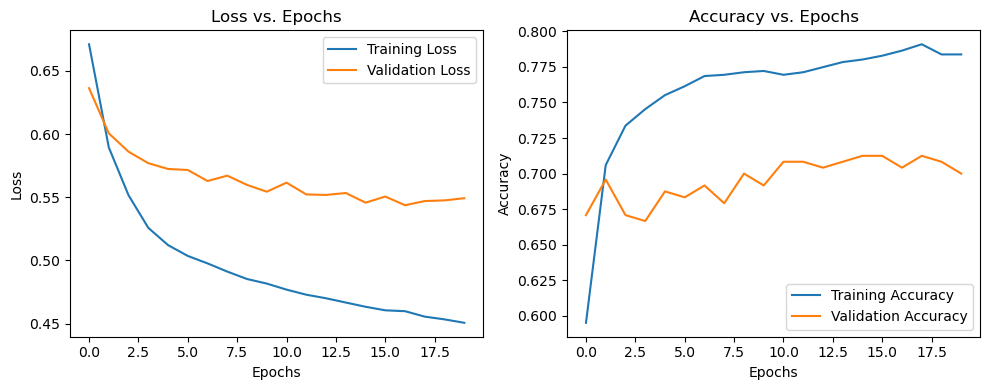

8/8 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7750
Test Loss: 0.46626657247543335
Test Accuracy: 0.7749999761581421


In [8]:
# Q4: Separate features and target variable
X = wine_data.drop("quality", axis=1)
y = (wine_data["quality"] > 5).astype(int)  # Convert to binary classification

# Q5: Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Q6: Scale the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Q7 and Q8: Design the model architecture and create a Sequential model
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Q9: Print model summary
model.summary()

# Q10: Set loss function, optimizer, and metrics
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Q11 and Q12: Fit the model to the training data
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=1)

# Q13: Get model parameters
model_params = model.get_weights()

# Q14: Store training history as a Pandas DataFrame
history_df = pd.DataFrame(history.history)

# Q15: Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_df["loss"], label="Training Loss")
plt.plot(history_df["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(history_df["accuracy"], label="Training Accuracy")
plt.plot(history_df["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

# Q16: Evaluate model performance on the test dataset
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)